In [2]:
import matplotlib.pyplot as plt
import numpy as np

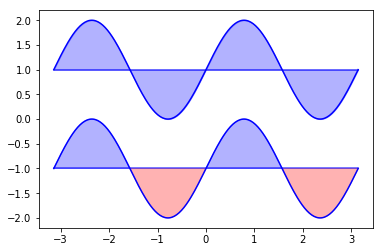

In [3]:
#0
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue')
plt.plot (X, Y-1, color='blue')
plt.fill_between(X, 1, Y+1, color='blue', alpha = 0.3)
plt.fill_between(X, -1, Y-1, color='blue', alpha = 0.3, where = Y>0)
plt.fill_between(X, -1, Y-1, color='red', alpha = 0.3, where = Y<=0)
plt.plot(X, np.ones(X.size), color = 'blue', alpha = 0.7)
plt.plot(X,-1*np.ones(X.size),color = 'blue', alpha = 0.7)
plt.show()

In [4]:
import pandas as pd
pplt=pd.read_csv("http://www.scipy-lectures.org/_downloads/populations.txt", delimiter="\t")
p=pplt.values
p

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

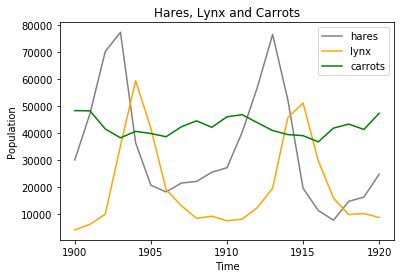

In [5]:
#1
plt.plot(p[:,0], p[:,1], label='hares', color = 'grey')
plt.plot(p[:,0], p[:,2], label='lynx', color='orange')
plt.plot(p[:,0], p[:,3], label = 'carrots', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Hares, Lynx and Carrots')
plt.xticks(np.linspace(1900, 1920, 5))
plt.legend()
plt.show()

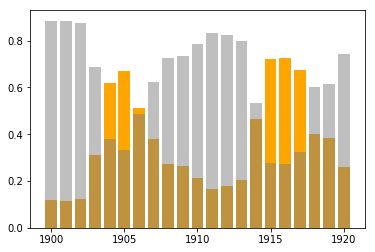

In [6]:
#2
lnh=p[:,1] + p[:,2]
l = p[:,2]/lnh
h = p[:,1]/lnh
plt.bar(p[:,0], l, color='orange')
plt.bar(p[:,0], h, color='grey', alpha=0.5)
plt.show()

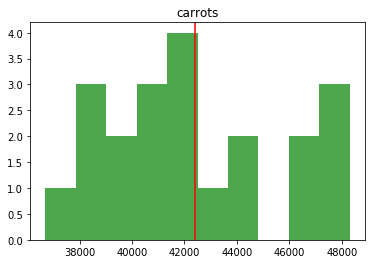

In [7]:
#3
m=np.mean(p[:,1:], 0)
std=np.std(p[:,1:], 0)
m_std = np.vstack((m,std))
plt.hist(p[:,1], bins = 10, color='grey', alpha=0.7)
plt.title('hares')
plt.axvline(m[0], color = 'red')
plt.show()
plt.title('lynx')
plt.hist(p[:,2], bins = 10, color='orange', alpha=0.7)
plt.axvline(m[1], color = 'red')
plt.show()
plt.title('carrots')
plt.axvline(m[2], color = 'red')
plt.hist(p[:,3], bins = 10, color='green', alpha=0.7)
plt.show()

['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']


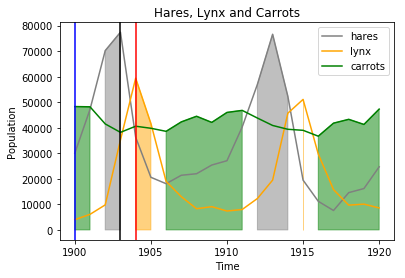

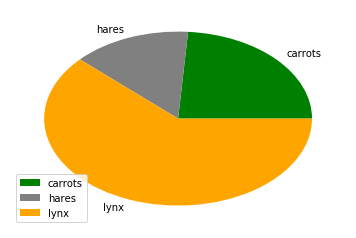

In [8]:
#4,5
maxp = np.argmax(p[:,1:], 1)
animals = np.empty(maxp.size, dtype = 'str')
maskc = maxp==2
maskl = maxp==1
maskh = maxp==0
animals[maskc] = 'C'
animals[maskh] = 'H'
animals[maskl] = 'L'
print(animals)
plt.plot(p[:,0], p[:,1], label='hares', color = 'grey')
plt.plot(p[:,0], p[:,2], label='lynx', color='orange')
plt.plot(p[:,0], p[:,3], label = 'carrots', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Hares, Lynx and Carrots')
plt.xticks(np.linspace(1900, 1920, 5))
plt.legend()
plt.axvline((1900+np.argmax(p[:,1:], 0))[0], color='black')
plt.axvline((1900+np.argmax(p[:,1:], 0))[1], color='red')
plt.axvline((1900+np.argmax(p[:,1:], 0))[2], color='blue')
plt.fill_between(p[:,0], 0,p[:,1], color='grey', alpha=0.5, where=maxp==0)
plt.fill_between(p[:,0], 0,p[:,2], color='orange', alpha=0.5, where=maxp==1)
plt.fill_between(p[:,0], 0,p[:,3], color='green', alpha=0.5, where=maxp==2)
plt.show()
plt.pie(np.bincount(maxp), labels=['carrots', 'hares', 'lynx'], colors=['green', 'grey', 'orange'])
plt.legend()
plt.show()

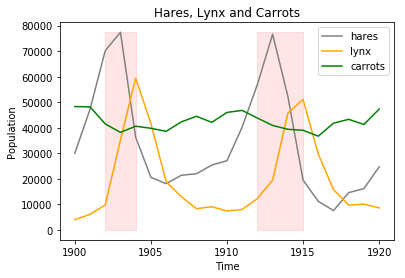

[1902. 1903. 1904. 1912. 1913. 1914. 1915.]


In [9]:
#6
periods = p[:,0][np.max(p[:,1:], 1)>=50000]
mx = np.max(p[:,1:])
plt.plot(p[:,0], p[:,1], label='hares', color = 'grey')
plt.plot(p[:,0], p[:,2], label='lynx', color='orange')
plt.plot(p[:,0], p[:,3], label = 'carrots', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Hares, Lynx and Carrots')
plt.xticks(np.linspace(1900, 1920, 5))
plt.fill_between(p[:,0],0,mx, color='red', alpha=0.1, where = np.max(p[:,1:], 1)>=50000)
plt.legend()
plt.show()
print(periods)

In [10]:
#7
print(p)
h1=1900+np.argmin(p[:,1])
mas = np.copy(p[:,1])
mas[h1-1900] = mx+1
h2=1900+np.argmin(mas)
l1=1900+np.argmin(p[:,2])
mas = np.copy(p[:,2])
mas[l1-1900] = mx+1
l2=1900+np.argmin(mas)
print(l2)
c1=1900+np.argmin(p[:,3])
mas = np.copy(p[:,3])
mas[c1-1900] = mx+1
c2=1900+np.argmin(mas)
print(h1,h2,l1,l2,c1,c2)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
1901
1917 1916 1900 1901 1916 1903


[[1.         0.07189206]
 [0.07189206 1.        ]]


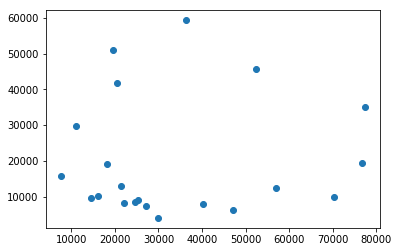

In [11]:
#8
plt.scatter(p[:,1], p[:,2])
print(np.corrcoef(p[:,1], p[:,2]))
plt.show()

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


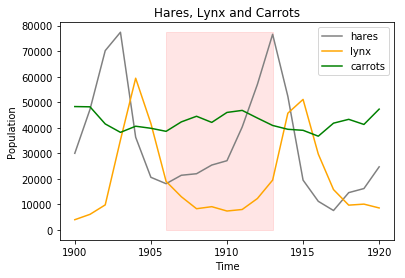

24557.142857142855 28978.947368421053 32215.873015873014
h_20_1 is perfect!!!
True value: 24700.0
Estimated value: 24557.142857142855


In [18]:
#10
print(p)
plt.plot(p[:,0], p[:,1], label='hares', color = 'grey')
plt.plot(p[:,0], p[:,2], label='lynx', color='orange')
plt.plot(p[:,0], p[:,3], label = 'carrots', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Hares, Lynx and Carrots')
plt.xticks(np.linspace(1900, 1920, 5))
plt.legend()
plt.fill_between(p[6:14,0], 0, np.max(p[:,1:]), color='red', alpha=0.1)
plt.show()

#Assume, that h20=h19+E, where E~Exp(L), then estimate L by sample (h1-h0,...,h19-h18) and consider, that E=1/L
l_n=1/np.mean(np.fabs(p[1:20,1]-p[0:19,1]))
h_20 = 1/l_n+p[19,1]

#Do the same, but consider the sample (h7-h6,...h13-h12), because its the longest area of population increase.
lam_n=1/np.mean(np.fabs(p[7:14,1]-p[6:13,1]))
h_20_1 = 1/lam_n+p[19,1]
print(h_20_1, h_20, np.mean(p[:,1:20]))
print("h_20_1 is perfect!!!\nTrue value: " + str(p[20,1])+"\nEstimated value: " + str(h_20_1))